In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


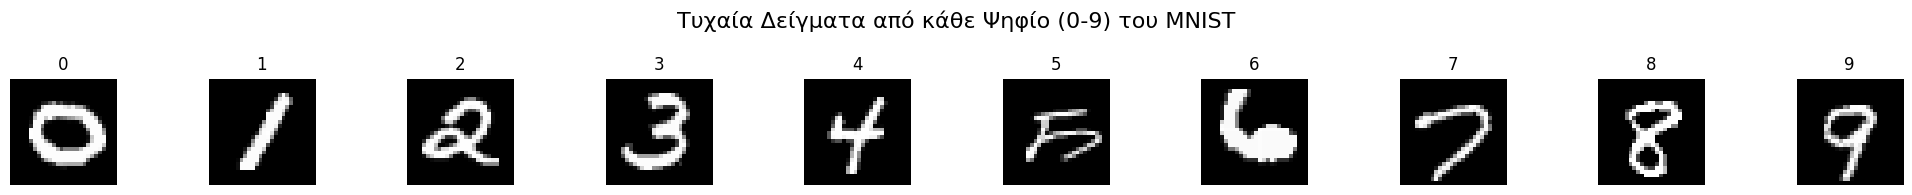

In [2]:
# Δημιουργούμε ένα plot για κάθε ψηφίο
fig, axes = plt.subplots(1, 10, figsize=(20, 2))

fig.suptitle('Τυχαία Δείγματα από κάθε Ψηφίο (0-9) του MNIST', fontsize=16)

for i in range(10):

    indices = np.where(y_train == i)[0]
    random_index = np.random.choice(indices)
    random_image = x_train[random_index]
    axes[i].imshow(random_image, cmap='gray')
    axes[i].set_title(str(i))
    axes[i].axis('off')

# Εμφάνιση των plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Τα pixel που βρίσκονται στην εξωτερική περίμετρο της εικόνας, ειδικά στις γωνίες και τα άκρα, είναι σχεδόν πάντα λευκά, δηλαδή 0 και δεν περιέχουν πληροφορίες για το σχήμα του ψηφίου.
Αυτά τα pixel συμβάλλουν ελάχιστα ή καθόλου στη διάκριση των ψηφίων.

In [4]:
# Μετατροπή εικόνων σε διανύσματα

vector_size = 28 * 28

x_train_vectors = x_train.reshape(x_train.shape[0], vector_size)
x_test_vectors = x_test.reshape(x_test.shape[0], vector_size)

print(f"Αρχικό σχήμα x_train: {x_train.shape}")
print(f"Νέο σχήμα x_train_vectors: {x_train_vectors.shape}")
print(f"Αρχικό σχήμα x_test: {x_test.shape}")
print(f"Νέο σχήμα x_test_vectors: {x_test_vectors.shape}")

Αρχικό σχήμα x_train: (60000, 28, 28)
Νέο σχήμα x_train_vectors: (60000, 784)
Αρχικό σχήμα x_test: (10000, 28, 28)
Νέο σχήμα x_test_vectors: (10000, 784)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Ορισμός των τιμών του k
N = x_train.shape[0] # N = 60,000
k_values = [5, 15, 51, int(np.sqrt(N))]
k_labels = ['5', '15', '51', f'sqrt(N)={int(np.sqrt(N))}']

train_accuracies = []
test_accuracies = []

print("Αποτελέσματα Ακρίβειας KNN")
for k in k_values:
    # Δημιουργία και Εκπαίδευση του ταξινομητή
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_vectors, y_train)

    # Υπολογισμός ακρίβειας στο train set
    y_train_pred = knn.predict(x_train_vectors)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # Υπολογισμός ακρίβειας στο test set
    y_test_pred = knn.predict(x_test_vectors)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

    print(f"k={k}:")
    print(f"  Ακρίβεια (Train): {train_acc:.4f}")
    print(f"  Ακρίβεια (Test):  {test_acc:.4f}")

Αποτελέσματα Ακρίβειας KNN
k=5:
  Ακρίβεια (Train): 0.9819
  Ακρίβεια (Test):  0.9688
k=15:
  Ακρίβεια (Train): 0.9710
  Ακρίβεια (Test):  0.9633
k=51:
  Ακρίβεια (Train): 0.9532
  Ακρίβεια (Test):  0.9533
k=244:
  Ακρίβεια (Train): 0.9211
  Ακρίβεια (Test):  0.9241


In [6]:
# Κανονικοποίηση των δεδομένων (Scaling [0, 1] διαιρώντας με το 255

x_train_scaled = x_train_vectors / 255.0
x_test_scaled = x_test_vectors / 255.0

print("Η κανονικοποίηση ολοκληρώθηκε.")
print(f"Max value before: {x_train_vectors.max()}, Max value after: {x_train_scaled.max()}")

train_accuracies_scaled = []
test_accuracies_scaled = []


k_values = [5, 15, 51,  244] # np.sqrt(N) = 244

for k in k_values:
    print(f"\n Εκπαίδευση για k={k}")

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)

    # Test accuracy
    y_pred_test = knn.predict(x_test_scaled)
    acc_test = accuracy_score(y_test, y_pred_test)
    test_accuracies_scaled.append(acc_test)

    # Train accuracy
    y_pred_train = knn.predict(x_train_scaled)
    acc_train = accuracy_score(y_train, y_pred_train)
    train_accuracies_scaled.append(acc_train)

    print(f"Test accuracy for k = {k}:  {acc_test:.4f}")

Η κανονικοποίηση ολοκληρώθηκε.
Max value before: 255, Max value after: 1.0

 Εκπαίδευση για k=5
Test accuracy for k = 5:  0.9688

 Εκπαίδευση για k=15
Test accuracy for k = 15:  0.9633

 Εκπαίδευση για k=51
Test accuracy for k = 51:  0.9533

 Εκπαίδευση για k=244
Test accuracy for k = 244:  0.9241


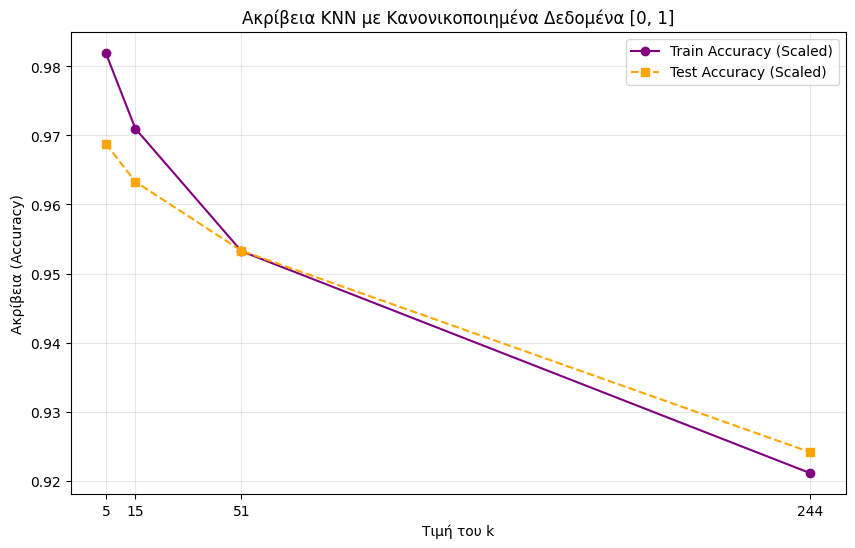


ΣΥΓΚΡΙΣΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ (Test Set)
k     | Unscaled Acc    | Scaled Acc      | Difference
--------------------------------------------------
5     | 0.9688          | 0.9688        | +0.0000
15    | 0.9633          | 0.9633        | +0.0000
51    | 0.9533          | 0.9533        | +0.0000
244   | 0.9241          | 0.9241        | +0.0000


In [7]:
# Δημιουργία Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies_scaled, marker='o', label='Train Accuracy (Scaled)', color='purple')
plt.plot(k_values, test_accuracies_scaled, marker='s', label='Test Accuracy (Scaled)', color='orange', linestyle='--')

plt.title('Ακρίβεια KNN με Κανονικοποιημένα Δεδομένα [0, 1]')
plt.xlabel('Τιμή του k')
plt.ylabel('Ακρίβεια (Accuracy)')
plt.xticks(k_values)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Σύγκριση Αποτελεσμάτων (Unscaled vs Scaled)
print("\nΣΥΓΚΡΙΣΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ (Test Set)")
print(f"{'k':<5} | {'Unscaled Acc':<15} | {'Scaled Acc':<15} | {'Difference'}")
print("-" * 50)
for i, k in enumerate(k_values):
    diff = test_accuracies_scaled[i] - test_accuracies[i]
    print(f"{k:<5} | {test_accuracies[i]:.4f}          | {test_accuracies_scaled[i]:.4f}        | {diff:+.4f}")

Παρατηρείται ότι η ακρίβεια των ταξινομητών παρέμεινε ίδια μετά την κανονικοποίηση των δεδομένων στο διάστημα [0, 1].
Αυτό συμβαίνει επειδή όλα τα χαρακτηριστικά (pixels) εκφράζουν το ίδιο φυσικό μέγεθος (φωτεινότητα) και έχουν ήδη το ίδιο εύρος τιμών (0 έως 255).
Οπότε, αν κανονικοποιήσουμε διαιρώντας ε το 255, οι αποστάσεις μικραίνουν, αλλά η σχετική διάταξη των γειτόνων δεν αλλάζει. Δηλαδή, ο κοντινότερος γείτονας πριν την κανονικοποίηση και μετά θα παραμείνει ο ίδιος.

--> Η πρόβλεψη του μοντέλου είναι: 3
Πραγματική τιμή του ψηφίου: 3


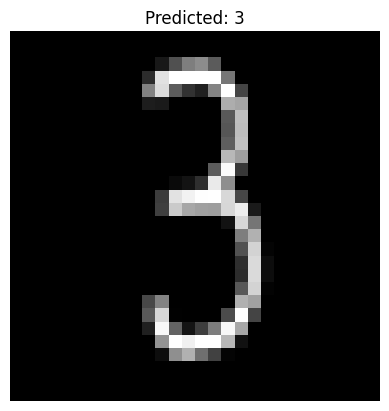

In [18]:
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Φόρτωση, Resize σε 28x28 και μετατροπή σε ασπρόμαυρο
img = Image.open('my_digit.png').convert('L').resize((28, 28))

# Μετατροπή σε διάνυσμα και διαίρεση με το 255
my_vector_scaled = np.array(img).reshape(1, -1) / 255.0

# Εκπαίδευση του καλύτερου μοντέλου (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

# Πρόβλεψη και εμφάνιση
prediction = knn.predict(my_vector_scaled)

print(f"--> Η πρόβλεψη του μοντέλου είναι: {prediction[0]}")
print("Πραγματική τιμή του ψηφίου: 3")

# Εμφάνιση της εικόνας που 'διαβάζει' το μοντέλο
plt.imshow(np.array(img), cmap='gray')
plt.axis('off')
plt.title(f"Predicted: {prediction[0]}")
plt.show()